<a href="https://colab.research.google.com/github/ubsuny/CompPhys/blob/EclipseExample/DataScience/EclipseCategorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorization of solar eclipses

[CCby4.0](https://creativecommons.org/licenses/by/4.0/), Tim Thomay, 2024)

Ideas based on this repository: (https://github.com/MrVtR/Solar_And_Lunar_Eclipses_Machine_Learning_Classification_Project/tree/main)

using data from: (https://www.kaggle.com/datasets/nasa/solar-eclipses)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def create_model():
  # Define the model layers
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer for one-hot encoded eclipse type
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer with 4 neurons and softmax activation
  ])

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
dfSolar = pd.read_csv("solar.csv")
dfSolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Catalog Number     11898 non-null  int64  
 1   Calendar Date      11898 non-null  object 
 2   Eclipse Time       11898 non-null  object 
 3   Delta T (s)        11898 non-null  int64  
 4   Lunation Number    11898 non-null  int64  
 5   Saros Number       11898 non-null  int64  
 6   Eclipse Type       11898 non-null  object 
 7   Gamma              11898 non-null  float64
 8   Eclipse Magnitude  11898 non-null  float64
 9   Latitude           11898 non-null  object 
 10  Longitude          11898 non-null  object 
 11  Sun Altitude       11898 non-null  int64  
 12  Sun Azimuth        11898 non-null  int64  
 13  Path Width (km)    7698 non-null   object 
 14  Central Duration   7698 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


In [ ]:
def lat_conv(lat):
  if lat[-1] == "S":
    lat = float(lat[:-1])*-1
  else:
    lat = float(lat[:-1])
  return lat
def lon_conv(lon):
  if lon[-1] == "W":
    lon = float(lon[:-1])*-1
  else:
    lon = float(lon[:-1])
  return lon


In [ ]:
dfSolar['declat'] = dfSolar.apply(lambda row: lat_conv(row['Latitude']),axis=1)
dfSolar['declon'] = dfSolar.apply(lambda row: lon_conv(row['Longitude']),axis=1)

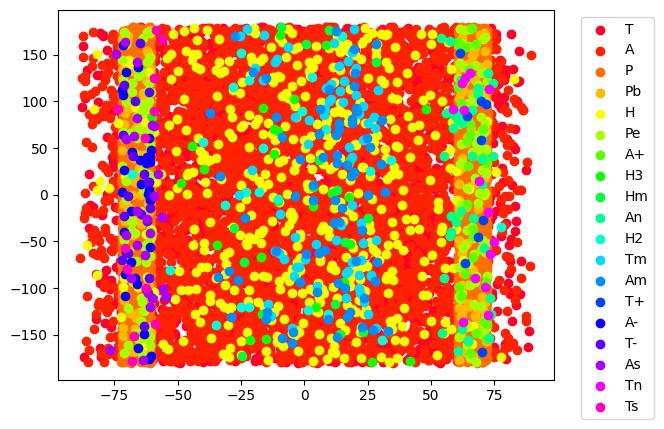

In [ ]:
tlist = dfSolar['Eclipse Type'].unique()
clist = plt.cm.gist_rainbow(np.linspace(0, 1, len(tlist)))
for t,c in zip(tlist,clist):
  plt.scatter(dfSolar[dfSolar['Eclipse Type']==t]['declat'],dfSolar[dfSolar['Eclipse Type']==t]['declon'],color=c,label=t)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.90196078e-01, 1.71625679e-01, 9.96283653e-01, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [6.07843137e-02, 6.36474236e-01, 9.41089253e-01, 1.00000000e+00],
       [5.68627451e-02, 7.67362681e-01, 9.05873422e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [2.76470588e-01, 9.38988361e-01, 8.19740483e-01, 1.00000000e+00],
       [3.86274510e-01, 9.84086337e-01, 7.67362681e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [7.23529412e-01, 9.38988361e-01, 5.72735140e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [9.43137255e-01, 7.67362681e-01, 4.23548513e

In [ ]:
len(color)

19

In [ ]:
# This data is just a placeholder, you would need to replace it with actual eclipse data
eclipse_types = ['total', 'partial', 'hybrid', 'annular']
one_hot_encoded_types = tf.keras.utils.to_categorical([[eclipse_types.index(type)] for type in eclipse_types])

# This data is just a placeholder, you would need to replace it with features of the eclipse
eclipse_features = tf.random.uniform((len(eclipse_types), 4))  # Replace 4 with the number of features

# Train the model
model = create_model()
model.fit(eclipse_features, one_hot_encoded_types, epochs=10)

# Use the model to predict the category of a new eclipse
new_eclipse_features = tf.random.uniform((1, 4))  # Replace 4 with the number of features
prediction = model.predict(new_eclipse_features)
predicted_category = eclipse_types[tf.argmax(prediction[0])]

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.4041 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 1.3951 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 1.3862 - accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 1.3775 - accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 1.3692 - accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 1.3610 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 1.3527 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 114ms/step - loss: 1.3445 - accuracy: 0.2500
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 1.3366 - accuracy: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 327ms/step


In [ ]:
print("Predicted category:", predicted_category)

Predicted category: partial
